# Contents <a id='top'></a>

1. <a href=#rv>Random Variables</a>
    1. <a href=#randomtext>Generating Random Text</a>
1. <a href=#des>Discrete Event Simulations</a>
    1. <a href=#des>Sandwich Shop</a>
    1. <a href=#simpy>About SimPy</a>
    1. <a href=#rc>Reneging Customers</a>
1. <a href=#ref>References and Links</a>

In [45]:
import simpy
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from numpy.random import default_rng
from scipy.stats import binom, bernoulli, norm, expon, uniform

import myscripts.simulation as ds

%matplotlib inline

<a id='rv'></a>
# 1. Random Variables
<a href=#top>(back to top)</a>

In statistics, we use random variables to describe the probabilistic behaviour of phenomenon. Random variables are real numbers that represent the phenomena we observe. For instance, we might let $X$ represent a coin toss, with $X=1$ representing Heads and $X=0$ representing Tails.

Random variables come with a rule (or function) that prescribes the probabilities with which it takes on particular values. For instance, if we had a fair coin, then the rule would be that 
$$
P(X=1) = P(X=0) = \frac{1}{2}
$$

On the other hand, a biased coin might follow the rule
$$
P(X=1) = \frac{2}{3},\quad P(X=0) = \frac{1}{3}
$$

This rule tells us which events are more likely, and which are less likely.

### Discrete vs. Continuous Random Variables.

Discrete random variables take on only a countable number of values. Examples are:
* A coin toss ($\{0, 1\}$)
* The number of taxis passing by a particular junction between 12noon and 1pm. ($\{0, 1, 2, \ldots, \}$)
* The number of coin tosses until we observe Heads. ($\{1, 2, 3, \ldots, \}$)

Discrete random variables are defined by their probability mass function (pmf), which is just a table or a function describing $P(X=i)$ for all possible $i$ values. Once we know the pmf of a random variable, we know everything about it - the mean, variance, quantiles, maximum values, etc.

We can visualise a pmf using a bar-chart. Here is the pmf for the above biased coin.

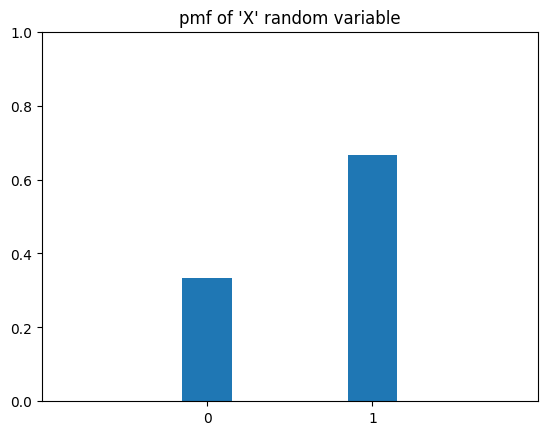

In [46]:
plt.bar([0,1], [1/3, 2/3], tick_label=['0', '1'], width=0.3);
plt.xlim(-1,2); plt.ylim(0,1); plt.title('pmf of \'X\' random variable' );

Here is the pmf for a random variable representing the total number of Heads after 10 tosses of that same coin. Suppose we call that new random variable $Y$.

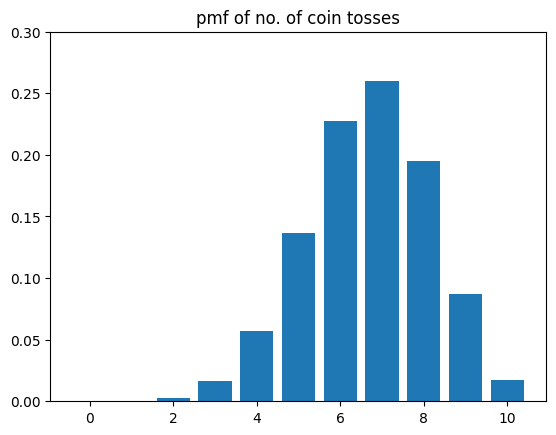

In [47]:
probs = binom.pmf(np.arange(0, 11), n=10, p=2/3)
plt.bar(np.arange(0, 11), probs);plt.ylim(0,0.3); plt.title('pmf of no. of coin tosses');

If we wish to find the probability of events, for instance, $P(Y \le 4)$, we sum up the heights of the bars.

Continuous random variables are defined by what is known as a probability density function. Continuous random variables can take on an uncountable number of values, for instance, all real numbers in the interval $[0,1]$.

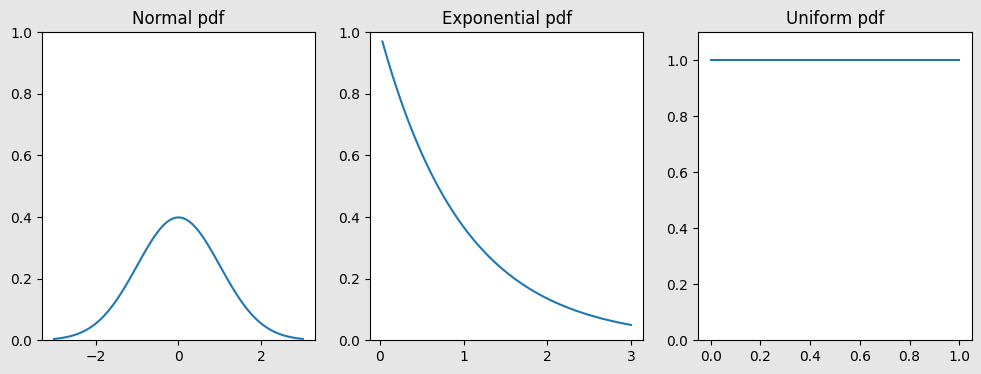

In [48]:
x = np.linspace(-3, 3, num=100)
y = norm.pdf(x)
plt.figure(figsize=(12,4), facecolor='0.9')
plt.subplot(131)
plt.plot(x,y)
plt.ylim(0,1)
plt.title('Normal pdf');

y = expon.pdf(x[x>0])
plt.subplot(132)
plt.plot(x[x>0],y)
plt.ylim(0,1)
plt.title('Exponential pdf');

x = np.linspace(0, 1, num=100)
y = uniform.pdf(x)
plt.subplot(133)
plt.plot(x,y)
plt.ylim(0,1.1)
plt.title('Uniform pdf');

### Generating Random Variates

With a computer, we can generate random variables from almost any distribution. There are built-in routines to generate from the 'named' distributions. For instance,

In [49]:
rng = default_rng(5003)

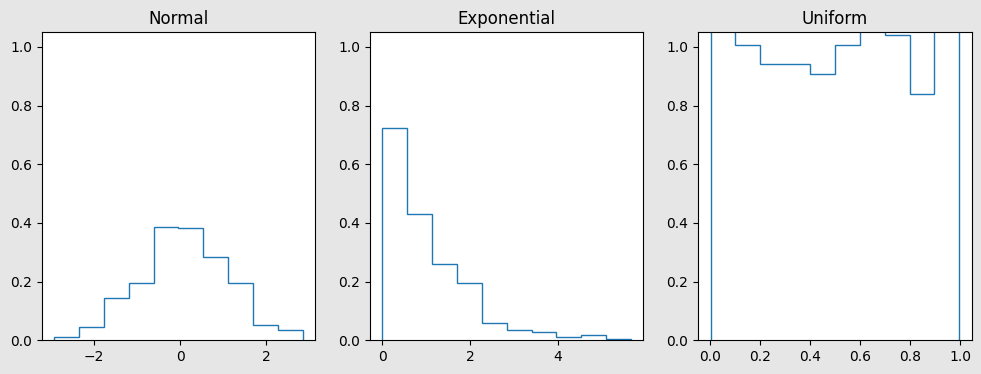

In [50]:
yvals = np.zeros((3,300))
yvals[0,:] = rng.normal(size=300)
yvals[1,:] = rng.exponential(size=300)
yvals[2, :] = rng.uniform(size=300)
pdfs = ['Normal', 'Exponential', 'Uniform']
plt.figure(figsize=(12,4), facecolor='0.9')

for i in np.arange(0,3):
    plt.subplot(1, 3, i+1)
    plt.hist(yvals[i,:], density=True, histtype='step')
    plt.title(pdfs[i])
    plt.ylim(0, 1.05)

Notice how the (normalised) histograms look a lot like the corresponding pdfs.

We can even generate values from our own custom distributions. For instance, suppose that we wish to simulate from the following pmf:

$$
P(X=-1) = \frac{1}{2},\quad P(X = 0) = \frac{1}{3}, \quad P(X=1) = \frac{1}{6}
$$

In [51]:
sim_x = rng.choice(np.array([-1,0,1]), size=1000, replace=True, p=np.array([1/2, 1/3, 1/6]))
sim_x

array([ 0,  1,  0, -1,  0,  0, -1, -1,  0, -1,  0, -1, -1,  0,  0, -1,  1,
        1,  0,  0, -1,  0,  1,  0,  0, -1,  1, -1, -1, -1,  0,  0, -1,  1,
       -1, -1, -1, -1,  0, -1, -1,  1, -1,  0,  0, -1, -1,  0, -1,  0,  0,
        1,  1, -1,  0, -1, -1,  1,  0, -1,  0, -1, -1, -1,  1, -1,  0,  1,
       -1,  0, -1,  1, -1, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  1,  0,
        1, -1,  0,  1,  1,  1, -1, -1,  1,  0,  0,  0,  0, -1, -1,  0, -1,
        0, -1,  0,  0, -1, -1,  0,  1, -1,  1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1,  0, -1, -1,  0,  0,  0,  1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1,  0,  0,  0,  0, -1,  0, -1, -1,  0, -1, -1,  1,  0, -1,
       -1,  0, -1, -1,  0,  0,  1,  0,  0,  0, -1, -1,  0, -1, -1, -1,  0,
        1, -1,  1,  1,  0, -1,  0,  0,  0,  0, -1, -1, -1, -1, -1,  0,  1,
       -1,  0,  0, -1,  1, -1,  0, -1, -1,  0,  0, -1, -1,  0,  1,  0,  0,
       -1, -1,  0,  0,  1, -1, -1,  0,  0,  1,  0,  0,  0,  0,  0,  1, -1,
       -1, -1, -1, -1, -1

In [52]:
pd.Series(sim_x).value_counts(normalize=True)

-1    0.479
 0    0.358
 1    0.163
Name: proportion, dtype: float64

If we normalize these counts, the values would resemble the pmf from which they arose. 

The point of simulations is that they can (almost) yield the pmf/pdf of a random variable that we do not know in a 
complicated process. Then we can extract things like means, variances from it. Or we can use it in other ways.

<a id='randomtext'></a>
# Generating Random Text

Here is an example of how we can simulate from distributions to generate random (nonsensical) sentences that are "similar" to actual sentences from a text.

The example uses some ideas from Natural Language Processing which we shall encounter later in the class. First, we install the `nltk` package - the natural language toolkit, and download the books that it uses in examples.

In [53]:
# !pip install nltk
import nltk

Next, either you run this:

In [54]:
# nltk.download('genesis')
kjv = nltk.corpus.genesis.words('english-kjv.txt')

Or this:

In [55]:
# nltk.download('punkt')
from nltk import word_tokenize

with open('../data/english-kjv.txt') as f:
    out = f.read()

kjv = word_tokenize(out)

The object `kjv` contains all the words and punctuations from the King James Bible. Here are the first 20 words:

In [56]:
' '.join(kjv[:20])

'In the beginning God created the heaven and the earth . And the earth was without form , and void'

In [57]:
rng.choice(kjv, size=20)

array(['sons', 'of', 'bring', 'asses', 'Abraham', 'ye', 'whom', 'do',
       'his', 'that', 'burnt', 'she', 'blessed', 'said', 'heaven', 'Irad',
       'and', 'foals', 'thee', 'said'], dtype='<U15')

Next, we extract all bigrams and create a dictionary of frequency distributions. Each frequency distribution tabulates the occurences of the *next* word.

In [58]:
bg = nltk.bigrams(kjv)
cfd = nltk.ConditionalFreqDist(bg)
cfd

<ConditionalFreqDist with 2800 conditions>

Suppose we are interested in what words/tokens come after the word 'And' in the bible:

In [59]:
cfd['And']

FreqDist({'he': 192, 'the': 185, 'they': 75, 'it': 66, 'Jacob': 56, 'God': 51, 'Joseph': 51, 'she': 37, 'Abraham': 36, 'when': 28, ...})

Thus 'he' is the most likely word after 'And'. The second most likely pairing would be 'And the', and so on.

In [60]:
cfd['And'].keys()

dict_keys(['the', 'God', 'let', 'to', 'on', 'every', 'out', 'a', 'Adam', 'they', 'he', 'when', 'I', 'unto', 'she', 'Abel', 'in', 'Cain', 'now', 'Lamech', 'Adah', 'his', 'Zillah', 'all', 'Seth', 'Enos', 'Cainan', 'Mahalaleel', 'Jared', 'Enoch', 'Methuselah', 'Noah', 'it', 'this', ',', 'of', 'take', 'surely', 'you', 'with', 'Ham', 'Shem', 'Cush', 'Resen', 'Mizraim', 'Pathrusim', 'Canaan', 'Arphaxad', 'Joktan', 'Hadoram', 'Obal', 'Ophir', 'their', 'Salah', 'Eber', 'Peleg', 'Reu', 'Serug', 'Nahor', 'Terah', 'Haran', 'Abram', 'there', 'Pharaoh', 'Lot', 'Melchizedek', 'blessed', 'also', 'thou', 'Sarai', 'Hagar', 'ye', 'Abraham', 'as', 'Ishmael', 'said', 'Sarah', 'while', 'Abimelech', 'yet', 'Isaac', 'Chesed', 'Bethuel', 'Ephron', 'after', 'if', 'Rebekah', 'my', 'before', 'her', 'Jokshan', 'these', 'Mishma', 'Jacob', 'Esau', 'make', 'by', 'tarry', 'give', 'that', 'thy', 'thither', 'Laban', 'Leah', 'Bilhah', 'Rachel', 'Zilpah', 'Reuben', 'afterwards', 'your', 'hast', 'Mizpah', 'early', 'so', '

In [61]:
cfd['And'].values()

dict_values([185, 51, 4, 4, 1, 2, 2, 2, 6, 75, 192, 28, 22, 8, 37, 2, 8, 5, 4, 4, 2, 15, 1, 16, 2, 2, 2, 2, 2, 3, 2, 10, 66, 2, 11, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 1, 13, 13, 18, 6, 1, 1, 2, 6, 3, 1, 4, 36, 5, 1, 8, 6, 2, 9, 1, 23, 1, 1, 2, 2, 2, 7, 1, 1, 1, 1, 15, 1, 56, 12, 2, 1, 1, 1, 2, 3, 1, 18, 7, 2, 5, 2, 6, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 12, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 51, 12, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1])

We can convert this into a pmf, just by normalising to ensure that it sums to 1. Then we are ready to generate a pairing once we know that the first word is 'And'. With the second word, we turn to its frequency distribution and simulate the third word, and so on.

<a id='des'></a>
# 2. Discrete Event Simulations
<a href=#top>(back to top)</a>

One of the most practical uses of simulation is in Discrete Event Simulations or DES. These are representations of real world. They can be very simple, or they can be ultra complex. They are useful in generating observations in order to study a phenomena, or to perform scenario planning.

Let's study one such latter application and, in the process, learn about a powerful Python Package for DES. It is known as `SimPy`.

## Sandwich Shop

Suppose we operate 'Shirley's Sandwich Shop'. It is a simple kiosk, with one counter serving customers. We receive feedback on social media that the queue is too long during the peak 3 hours from 11am to 2pm. Many customers are being turned away. We would like to investigate ways in which we can solve this issue.

This simplified process has been coded into the IND5003 simulation module. Let's take a look at how it runs first. First, we initialise a dictionary to store the output variables: arrival times, waiting times and service times. Next, we initialise an environment to run the process in. Finally, we create the single "service counter" within the environment. 

In [77]:
ds.generate_model(cfd, 'And', 20)

And Bela the youngest brother , shall be with their dwelling in the land of the son 's son . 

In [93]:
cdict = {}
env = simpy.Environment()
counter = simpy.Resource(env, capacity=1)

In [94]:
env.process(ds.s1(env, 2, counter, 1.0, cdict, True))

<Process(s1) object at 0x2b308a890>

In [95]:
env.run(until=100)  # until=15, 30, ..., 180

ARR: Customer  1 arrives at time 6.388 minutes.
SERV: Now the time is 6.388,  1 waited 0.000 minutes
DEP:  1 leaving, at 8.141 minutes past 11
ARR: Customer  2 arrives at time 14.656 minutes.
SERV: Now the time is 14.656,  2 waited 0.000 minutes
ARR: Customer  3 arrives at time 14.957 minutes.
ARR: Customer  4 arrives at time 15.925 minutes.
ARR: Customer  5 arrives at time 16.435 minutes.
ARR: Customer  6 arrives at time 16.467 minutes.
DEP:  2 leaving, at 16.746 minutes past 11
SERV: Now the time is 16.746,  3 waited 1.789 minutes
DEP:  3 leaving, at 18.855 minutes past 11
SERV: Now the time is 18.855,  4 waited 2.931 minutes
ARR: Customer  7 arrives at time 20.486 minutes.
DEP:  4 leaving, at 20.560 minutes past 11
SERV: Now the time is 20.560,  5 waited 4.126 minutes
ARR: Customer  8 arrives at time 21.776 minutes.
DEP:  5 leaving, at 23.812 minutes past 11
SERV: Now the time is 23.812,  6 waited 7.345 minutes
ARR: Customer  9 arrives at time 26.029 minutes.
DEP:  6 leaving, at 26.

In [96]:
cdict

{1: array([6.38834841, 0.        , 1.7526982 ]),
 2: array([14.65618768,  0.        ,  2.08999629]),
 3: array([14.95697224,  1.78921173,  2.10930112]),
 4: array([15.9248142 ,  2.93067089,  1.70492143]),
 5: array([16.43485091,  4.12555561,  3.25181308]),
 6: array([16.46676226,  7.34545733,  2.71814954]),
 7: array([20.48576258,  6.04460655,  2.13281456]),
 8: array([21.77610297,  6.88708073,  1.51981682]),
 9: array([26.02879165,  4.15420886,  2.955729  ]),
 10: array([27.09767516,  6.04105436,  3.32907931]),
 11: array([27.24441296,  9.22339587,  2.37958744]),
 12: array([28.4389727 , 10.40842357,  2.45436477]),
 13: array([31.73326905,  9.56849199,  3.07272605]),
 14: array([35.16847039,  9.20601669,  3.45812337]),
 15: array([35.60637294, 12.22623752,  1.71029991]),
 16: array([38.2338604 , 11.30904997,  2.2992075 ]),
 17: array([39.8655357 , 11.97658215,  2.02386398]),
 18: array([42.39471868, 11.47126316,  4.30088649]),
 19: array([42.4012492 , 15.76561914,  1.71301586]),
 20: 

We can convert the output into a dataframe to study it further.

In [97]:
cdf = pd.DataFrame.from_dict(cdict, orient='index')
cdf.columns = ['arr', 'wait', 'serv']

In [98]:
cdf

,arr,wait,serv
1,6.388348,0.000000,1.752698
2,14.656188,0.000000,2.089996
3,14.956972,1.789212,2.109301
4,15.924814,2.930671,1.704921
5,16.434851,4.125556,3.251813
6,16.466762,7.345457,2.718150
7,20.485763,6.044607,2.132815
8,21.776103,6.887081,1.519817
9,26.028792,4.154209,2.955729
10,27.097675,6.041054,3.329079


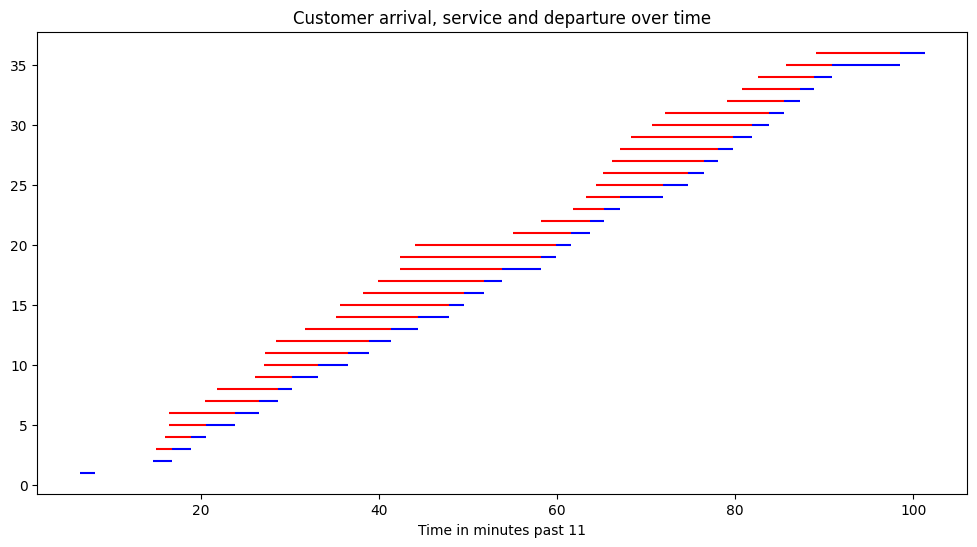

In [99]:
plt.figure(figsize=(12,6))
plt.hlines(np.concatenate((np.arange(cdf.shape[0]) + 1, np.arange(cdf.shape[0]) + 1)), 
           np.concatenate((cdf.arr, cdf.arr + cdf.wait)), 
           np.concatenate((cdf.arr + cdf.wait, cdf.arr + cdf.wait + cdf.serv)), colors=['r']*cdf.shape[0] + ['b']*cdf.shape[0]);
plt.title('Customer arrival, service and departure over time');
plt.xlabel('Time in minutes past 11');

In [100]:
cdf.describe()

,arr,wait,serv
count,40.000000,36.000000,36.000000
mean,51.266175,7.836514,2.455997
std,27.128214,3.919379,1.188360
min,6.388348,0.000000,1.519817
25%,27.207729,5.436693,1.713085
50%,49.556260,7.480411,2.099649
75%,71.057871,11.050311,2.758284
max,98.610137,15.843858,7.660527


In [101]:
np.sum(cdf.wait.isna())

4

In [102]:
cdf.info()
#cdf.dropna().wait.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 1 to 40
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   arr     40 non-null     float64
 1   wait    36 non-null     float64
 2   serv    36 non-null     float64
dtypes: float64(3)
memory usage: 1.2 KB


Let us carry out this simulation 100 times to understand:
1. The median wait-time for customers who were eventually served.
2. The number of customers who did not get served.

In [103]:
mwt = []
unserved = []

for ii in np.arange(0, 100):
    cdict = {}
    env = simpy.Environment()
    counter = simpy.Resource(env, capacity=1)
    env.process(ds.s1(env, 2, counter, 1.0, cdict, False))
    env.run(until=180)
    
    cdf = pd.DataFrame.from_dict(cdict, orient='index')
    cdf.columns = ['arr', 'wait', 'serv']
    
    unserved.append(np.sum(cdf.wait.isna()))
    mwt.append(cdf.dropna().wait.median())
    

In [107]:
pd.DataFrame({'mwt':mwt, 'unserved':unserved})

,mwt,unserved
0,26.785926,22
1,23.261179,17
2,31.066343,23
3,14.575218,11
4,10.038790,13
...,...,...
95,14.717880,6
96,12.037793,8
97,27.795850,32
98,38.468322,32


In [108]:
pd.DataFrame({'mwt':mwt, 'unserved':unserved}).describe()

,mwt,unserved
count,100.000000,100.000000
mean,21.531285,21.080000
std,10.816734,10.071141
min,3.151825,0.000000
25%,12.400380,14.000000
50%,21.339467,20.500000
75%,29.487272,30.000000
max,52.440105,46.000000


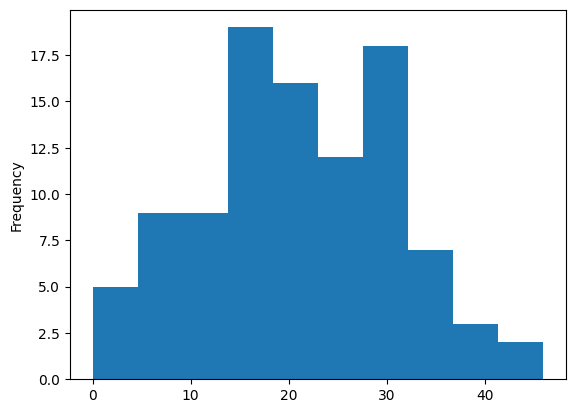

In [114]:
pd.DataFrame({'mwt':mwt, 'unserved':unserved}).unserved.plot(kind='hist');

<a id='simpy'></a>
## About SimPy

SimPy is a DES software/framework in Python. In it, the behaviour of active components such as customers is modelled as a process. Processes can interact with one another, and can start process of their own. All processes live in an environment, and they react and trigger events.

Processes are written as generator functions. They contain a `yield` statement that can suspend the execution of a function while waiting for an event to complete.

In [111]:
def gen_x():
    x = ['Hello', 'who', 'are', 'you']
    for ii in x:
        yield ii  # change yield to return and see what happens

In [120]:
gg = gen_x()

In [115]:
gg

<generator object gen_x at 0x2b6c60110>

gg is now a generator object. It will run until the `yield` statement, at which point it returns `ii`, and suspend all variables, every time you call `next` on it.

In [122]:
next(gg)   # call next to generate the value by iteration

'who'

In [123]:
def gen_inf_x():
    ii = 0
    while True:
        ii += 1
        yield ii

In [124]:
gg2 = gen_inf_x()

In [129]:
next(gg2)

5

 Here's a little more detail on [generators](https://www.oreilly.com/content/2-great-benefits-of-python-generators-and-how-they-changed-me-forever/).

In SimPy, processes have to be written as generator function. Here is a simple process &mdash; a car alternating between driving and parking.

In [130]:
def car(env):
    while True:
        print(f'Start parking at {env.now}')
        yield env.timeout(5)
        
        print(f'Start driving at {env.now}')
        yield env.timeout(2)

In [131]:
cc = car(env)

In [132]:
env = simpy.Environment()
env.process(car(env))

<Process(car) object at 0x2b6d16490>

So far, we have defined a car process, created the generator object and attached it to the environment. Now we run it for 15 units of time.

In [133]:
env.run(until=15)

Start parking at 0
Start driving at 5
Start parking at 7
Start driving at 12
Start parking at 14


Processes are too simplistic if they do not interact. One way of interacting is to compete for a shared resource. In Shirley's Sandwich Shop, the customers are competing for a counter service.

The first process in that first configuration is the source process (see the function s1). This is the fountain of customers. A customer process (function c1) is created and attached to the environment at random time intervals. The intervals follow an exponential distribution.

Each customer, upon arrival, tries to get service. If there is a queue already there, he/she has to join the queue and wait. Once the customer is at the head of the queue, it takes a random amount of time for him to finish his job. The random amount of time is 1.5 + an Exponential random variable with mean 1. 

<a id='rc'></a>
## Reneging Customers

Now let us add another slight complication. We are going to assume that customers are not as patient as we hoped they would be. If they have been waiting in line too long, they are liable to leave the shop out of frustration. We assume that their "patience" is a uniform random variable between 0.5 and 4.0 minutes. Finally, to gain some indication of how much business is being lost, we represent the amount of money a customer was willing to spend when he walked into the store as a gamma random variable. Finally, we monitor the queue-length every time a customer arrives in as well.

In [134]:
cdict = {}
env = simpy.Environment()
counter = simpy.Resource(env, capacity=1)

env.process(ds.s2(env, 2, counter, 1.0, cdict, True))
env.run(until=180)  # until=15

ARR: Customer  1 arrives at time 1.045 minutes.
SERV: Now the time is 1.045,  1 waited 0.000 minutes
DEP:  1 leaving, at 3.417 minutes past 11
ARR: Customer  2 arrives at time 7.141 minutes.
SERV: Now the time is 7.141,  2 waited 0.000 minutes
DEP:  2 leaving, at 8.853 minutes past 11
ARR: Customer  3 arrives at time 12.920 minutes.
SERV: Now the time is 12.920,  3 waited 0.000 minutes
ARR: Customer  4 arrives at time 13.187 minutes.
ARR: Customer  5 arrives at time 14.064 minutes.
REN:  4 leaving, at 14.180 minutes past 11
DEP:  3 leaving, at 14.455 minutes past 11
SERV: Now the time is 14.455,  5 waited 0.390 minutes
DEP:  5 leaving, at 16.465 minutes past 11
ARR: Customer  6 arrives at time 17.771 minutes.
SERV: Now the time is 17.771,  6 waited 0.000 minutes
DEP:  6 leaving, at 22.069 minutes past 11
ARR: Customer  7 arrives at time 22.599 minutes.
SERV: Now the time is 22.599,  7 waited 0.000 minutes
ARR: Customer  8 arrives at time 24.394 minutes.
ARR: Customer  9 arrives at time

Let us construct a data frame to study the output for this run.

In [135]:
cdf = pd.DataFrame.from_dict(cdict, orient='index')
cdf.columns = ['arr', 'wait', 'serv', 'ren', 'amt_spent', 'qlen']
cdf

,arr,wait,serv,ren,amt_spent,qlen
1,1.044874,0.000000,2.371763,0.0,7.918890,0.0
2,7.140656,0.000000,1.712146,0.0,6.123916,0.0
3,12.919814,0.000000,1.535115,0.0,4.990697,0.0
4,13.187404,0.992252,NaN,1.0,1.581356,0.0
5,14.064452,0.390477,2.009702,0.0,6.763825,1.0
...,...,...,...,...,...,...
90,170.900903,2.294926,NaN,1.0,5.655773,1.0
91,172.005809,1.194098,1.684889,0.0,8.463062,2.0
92,175.804578,0.000000,1.525315,0.0,2.609004,0.0
93,176.552145,0.777748,1.961971,0.0,8.093503,0.0


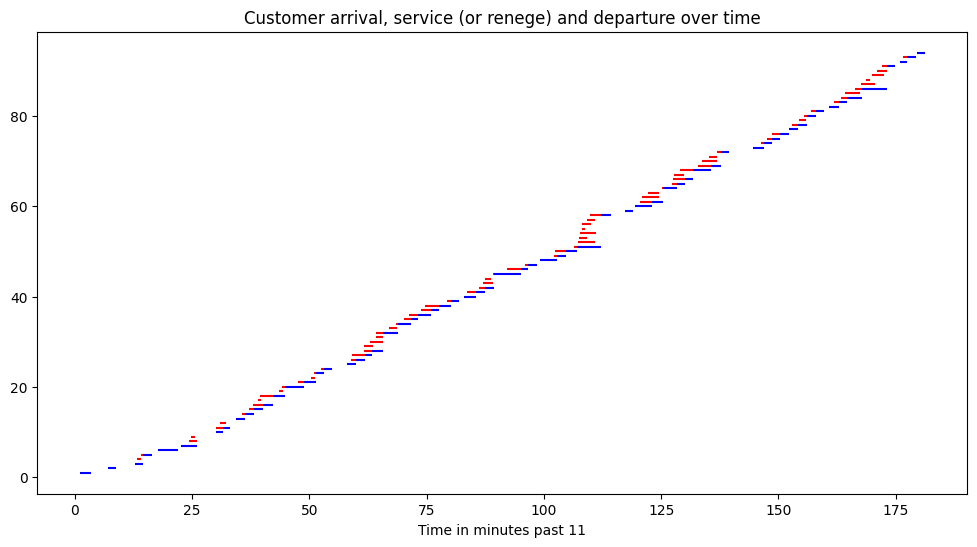

In [136]:
plt.figure(figsize=(12,6))
plt.hlines(np.concatenate((np.arange(cdf.shape[0]) + 1, np.arange(cdf.shape[0]) + 1)), 
           np.concatenate((cdf.arr, cdf.arr + cdf.wait)), 
           np.concatenate((cdf.arr + cdf.wait, cdf.arr + cdf.wait + cdf.serv)), colors=['r']*cdf.shape[0] + ['b']*cdf.shape[0]);
plt.title('Customer arrival, service (or renege) and departure over time');
plt.xlabel('Time in minutes past 11');

In [140]:
cdf.describe()

,arr,wait,serv,ren,amt_spent,qlen
count,94.000000,94.000000,64.000000,94.000000,94.000000,94.000000
mean,95.125313,1.322081,2.341754,0.319149,5.839190,0.702128
std,50.056960,1.020576,0.949894,0.468646,3.280816,0.959724
min,1.044874,0.000000,1.525315,0.000000,1.291989,0.000000
25%,53.946422,0.537146,1.763037,0.000000,3.696112,0.000000
50%,97.662489,1.222118,1.965559,0.000000,5.154425,0.000000
75%,134.810731,1.994669,2.500869,1.000000,7.344516,1.000000
max,179.462013,3.720795,5.589416,1.000000,19.074046,4.000000


In [141]:
amt = cdf[cdf.ren == 1].amt_spent.sum()
print(f'Num of reneged customers: {int(cdf.ren.sum())}')
print(f'Amt. potentially earned : ${amt:5.2f}')

Num of reneged customers: 30
Amt. potentially earned : $160.59


In [142]:
cdf

,arr,wait,serv,ren,amt_spent,qlen
1,1.044874,0.000000,2.371763,0.0,7.918890,0.0
2,7.140656,0.000000,1.712146,0.0,6.123916,0.0
3,12.919814,0.000000,1.535115,0.0,4.990697,0.0
4,13.187404,0.992252,NaN,1.0,1.581356,0.0
5,14.064452,0.390477,2.009702,0.0,6.763825,1.0
...,...,...,...,...,...,...
90,170.900903,2.294926,NaN,1.0,5.655773,1.0
91,172.005809,1.194098,1.684889,0.0,8.463062,2.0
92,175.804578,0.000000,1.525315,0.0,2.609004,0.0
93,176.552145,0.777748,1.961971,0.0,8.093503,0.0


Here is a plot of how queue length varied during the lunch period.

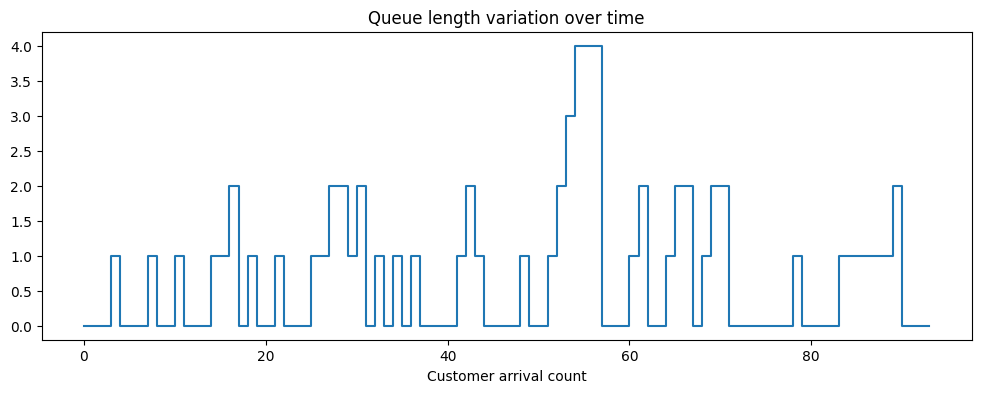

In [143]:
plt.figure(figsize=(12,4))
plt.step(np.arange(cdf.shape[0]), cdf.qlen); plt.title('Queue length variation over time');
plt.xlabel('Customer arrival count');

Let us perform a simulation once more, for 100 iterations

In [158]:
amt = []
reneged = []
served = []

for ii in np.arange(0, 100):
    cdict = {}
    env = simpy.Environment()
    counter = simpy.Resource(env, capacity=1)
    env.process(ds.s2(env, 2, counter, 1.0, cdict, False))
    env.run(until=180)
    
    cdf = pd.DataFrame.from_dict(cdict, orient='index')
    cdf.columns = ['arr', 'wait', 'serv', 'ren', 'amt_spent', 'qlen']
    
    amt_here = cdf[cdf.ren == 1].amt_spent.sum()
    reneged.append(cdf.ren.sum())
    amt.append(amt_here)
    served.append(cdf.wait.dropna().count())

In [159]:
cdf

,arr,wait,serv,ren,amt_spent,qlen
1,0.455728,0.000000,1.690913,0.0,6.436635,0.0
2,1.980512,0.166129,1.750128,0.0,9.522203,0.0
3,2.509802,1.386967,2.698380,0.0,3.629791,0.0
4,6.282573,0.312576,1.979600,0.0,4.518798,0.0
5,9.350311,0.000000,5.053751,0.0,6.106056,0.0
...,...,...,...,...,...,...
83,175.646511,1.108165,1.937961,0.0,6.128153,2.0
84,176.564511,2.027962,NaN,1.0,6.988529,1.0
85,178.945391,0.000000,1.803059,0.0,3.949620,0.0
86,179.122959,NaN,NaN,NaN,7.602077,0.0


In [160]:
pd.DataFrame({'amt':amt, 'reneged':reneged, 'served': served}).describe()

,amt,reneged,served
count,100.000000,100.000000,100.000000
mean,181.579096,30.530000,85.990000
std,46.320683,7.152671,9.525611
min,79.111818,15.000000,60.000000
25%,155.716549,25.000000,80.000000
50%,176.656970,30.000000,86.000000
75%,207.784927,35.000000,91.250000
max,345.127497,49.000000,110.000000


Simulation output is typically used to compute the mean of a process. For instance, we can use the arithmetic mean above to estimate the mean amount of dollars lost, and the mean number of customers who reneged. We can use the sample variance to compute confidence intervals if we wish too. 

Suppose the sandwich shop now wishes to answer two questions:
1. If the shop wishes to serve an average of 70 customers per day, by how much should it extend lunch time?
2. If the can reduce its service time by 20%, how many more customers can it serve each day?

If you make changes to functions in a module (e.g., `simulation.py`), you can use the following code to reload the module:

In [151]:
import importlib
importlib.reload(ds)

<module 'myscripts.simulation' from '/Users/wuqilong/anaconda3/envs/myenv/IND5003/python_notebooks/myscripts/simulation.py'>

## Simulation-Based Modeling

In simulation-based modeling, we have several things to consider. 

1. What input distributions should I use?
2. How complicated does my simulation need to be?
3. How do I know it is giving the right results?
4. How many simulations should I run?

Here are some general guidelines to begin with your simulation model:

1. Start simple.
2. Use your own data to decide what distributions should be used.
3. Try with different distributions to see how sensitive your results are to those choices.
4. Add more and more realistic layers to our simulation as you proceed.
5. Remember that simulation is used in estimating mean values. You will be able to estimate standard deviations around your estimate too.

<a id='ref'></a>
# 3. References
<a href=#top>(back to top)</a>

1. [Simulation](https://www.amazon.com/Simulation-Sheldon-M-Ross/dp/0124158250) by Sheldon Ross is very useful for learning about simulation techniques and concepts. It is available online from our [NUS library](https://linc.nus.edu.sg/record=b3254096).
2. [SimPy](https://simpy.readthedocs.io/en/latest/) documentation. The examples section contains several useful examples that you can customise for your particular case to begin with.
3. [Generators](https://docs.python.org/3/howto/functional.html?highlight=generator#generators) straight from the horse's mouth.
3. More about [generators](https://www.oreilly.com/content/2-great-benefits-of-python-generators-and-how-they-changed-me-forever/).